In [65]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from scipy import stats 
import matplotlib.pyplot as plt
from empiricaldist import Pmf , Cdf
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings("ignore")

In [66]:
df_aofm = pd.read_csv("PPO18_age_of_firstime_mothers.csv")# aofm = age_of_firstime_mothers

## EDA(Exploratory Data Analysis)

In [67]:
df_aofm.head()

,Statistic Label,State,Year,UNIT,VALUE
0,Mean Age of First Time- Mothers,State,1990,Years,26.3
1,Mean Age of First Time- Mothers,State,1991,Years,26.3
2,Mean Age of First Time- Mothers,State,1992,Years,26.4
3,Mean Age of First Time- Mothers,State,1993,Years,26.6
4,Mean Age of First Time- Mothers,State,1994,Years,26.8


In [68]:
print("CHECKING the shape: ",df_aofm.shape)#Checking shape
print("\n CHECKING NULL values :\n",df_aofm.dtypes)#checking data types
print("\n Check info:\n",df_aofm.info)# checking info
print("\n COUNT is :\n",df_aofm.count() )#count rows
print("\n CHECKING NULL values :\n",df_aofm.isnull().sum())#checking null values

CHECKING the shape:  (29, 5)

 CHECKING NULL values :
 Statistic Label     object
State               object
Year                 int64
UNIT                object
VALUE              float64
dtype: object

 Check info:
 <bound method DataFrame.info of                     Statistic Label  State  Year   UNIT  VALUE
0   Mean Age of First Time- Mothers  State  1990  Years   26.3
1   Mean Age of First Time- Mothers  State  1991  Years   26.3
2   Mean Age of First Time- Mothers  State  1992  Years   26.4
3   Mean Age of First Time- Mothers  State  1993  Years   26.6
4   Mean Age of First Time- Mothers  State  1994  Years   26.8
5   Mean Age of First Time- Mothers  State  1995  Years   27.0
6   Mean Age of First Time- Mothers  State  1996  Years   27.0
7   Mean Age of First Time- Mothers  State  1997  Years   27.1
8   Mean Age of First Time- Mothers  State  1998  Years   27.1
9   Mean Age of First Time- Mothers  State  1999  Years   27.2
10  Mean Age of First Time- Mothers  State  2000  Years 

In [69]:
df_aofm.columns# get column names

Index(['Statistic Label', 'State', 'Year', 'UNIT', 'VALUE'], dtype='object')

In [70]:
cols_to_drop = ['State','UNIT']# dropping columns that I won't use.
df_aofm.drop(columns=cols_to_drop, inplace=True)

In [71]:
df_aofm.rename(columns = {'Year':'year','VALUE':'average_age'},inplace = True) #Changing column names

In [72]:
#df_aofm['Statistic Label'] = df_aofm['Statistic Label'].astype("category")
#df_aofm['Statistic Label'] = df_aofm['Statistic Label'].cat.codes

In [73]:
df_aofm.head(10)# dataset before visualizing data


,Statistic Label,year,average_age
0,Mean Age of First Time- Mothers,1990,26.3
1,Mean Age of First Time- Mothers,1991,26.3
2,Mean Age of First Time- Mothers,1992,26.4
3,Mean Age of First Time- Mothers,1993,26.6
4,Mean Age of First Time- Mothers,1994,26.8
5,Mean Age of First Time- Mothers,1995,27.0
6,Mean Age of First Time- Mothers,1996,27.0
7,Mean Age of First Time- Mothers,1997,27.1
8,Mean Age of First Time- Mothers,1998,27.1
9,Mean Age of First Time- Mothers,1999,27.2


# visualize data with plot

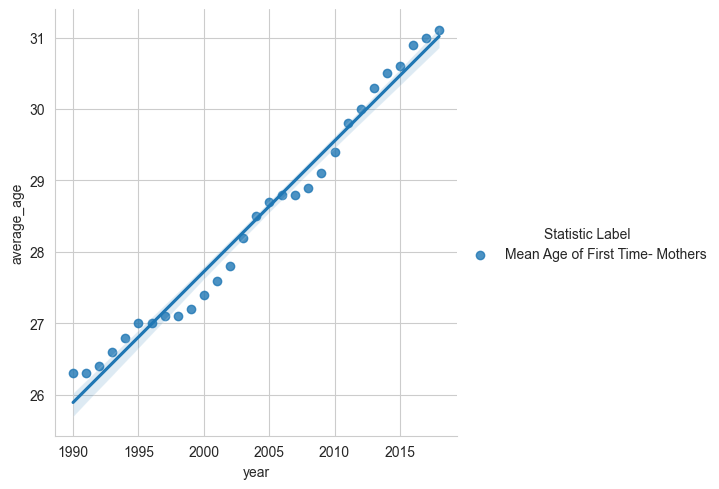

In [74]:
sns.set_style('whitegrid') 
sns.lmplot(x ='year', y ='average_age', data = df_aofm,hue ='Statistic Label') #,hue ='Broad Nationality Group'

## Visualize data using heatmap

<Axes: >

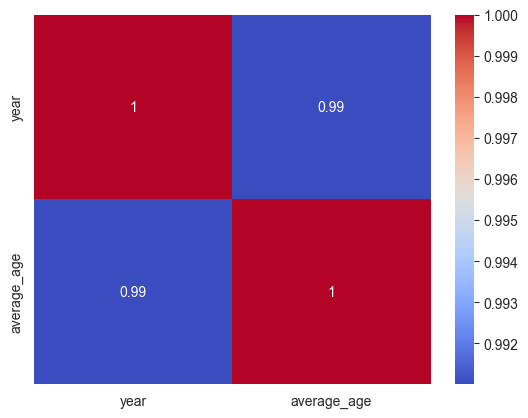

In [75]:
cols = ["year",'average_age']
coef_heat = np.corrcoef(df_aofm[cols].values.T)
sns.heatmap(coef_heat,cmap="coolwarm",yticklabels=cols,xticklabels=cols,annot=True,cbar=True)

## Splitting the dataset into the Training set and Test set

In [90]:
# import train_test_split from the library sklearn
from sklearn.model_selection import train_test_split

# Declare a variable named as 'X' and 'y'
X = df_aofm.iloc[:, 1].values # independent variable
y = df_aofm['average_age'].values # Target variable

X = X.reshape(-1,1) # reshape to an 2D array
y = y.reshape(-1, 1) # reshape to an 2D array

# Split the data into 70% and 30% by using a parameter test_size = 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

# Display the size of the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((29, 1), (29, 1), (17, 1), (12, 1), (17, 1), (12, 1))

## using linear regression model

In [91]:
# Initialise an object slr by calling a method named as 'LinearRegression()'
from sklearn.linear_model import LinearRegression
lr = LinearRegression()#new linear regression class

# Train the model
lr.fit(X_train, y_train)

# Predict the results for the training and testing
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

## checking accuracy

In [92]:
from sklearn.metrics import r2_score

r2_score(y_train,y_pred_train)# checking accuracy in training data

0.980392433780072

In [93]:
r2_score(y_test,y_pred_test)# checking accuracy in test data

0.9846081538162629